In [ ]:
'''
모든 문제를 풀기전에 아래 코드를 실행해주세요.
'''

'\n모든 문제를 풀기전에 아래 코드를 실행해주세요.\n'

In [1]:
# 데이터 분석 및 시각화에 필요한 기본 라이브러리들을 가져옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn 라이브러리에서 필요한 모듈들을 불러옵니다.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# TensorFlow Keras 라이브러리를 불러옵니다.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
'''
[문제01] Scikit-learn은 머신러닝을 위한 다양한 도구를 제공하는 핵심 라이브러리입니다. sklearn.preprocessing 모듈에서 RobustScaler 클래스를 임포트하는 코드를 작성하세요.
'''

'\n[문제01] Scikit-learn은 머신러닝을 위한 다양한 도구를 제공하는 핵심 라이브러리입니다. sklearn.preprocessing 모듈에서 RobustScaler 클래스를 임포트하는 코드를 작성하세요.\n'

In [3]:
from sklearn.preprocessing import RobustScaler

In [4]:
'''
[문제02] AI모델링을 위해 분석할 데이터를 준비하고 결측치 현황을 파악하려고 합니다. 아래 가이드에 따라 코드를 작성하세요.
- Pandas의 read_csv 함수를 사용하여 3_employee_salary.csv 파일을 읽어 데이터프레임 변수 emp_df에 할당하세요.
- isnull() 과 sum() 함수를 사용하여 emp_df의 컬럼별 결측치 개수를 확인하세요.
'''

'\n[문제02] AI모델링을 위해 분석할 데이터를 준비하고 결측치 현황을 파악하려고 합니다. 아래 가이드에 따라 코드를 작성하세요.\n- Pandas의 read_csv 함수를 사용하여 3_employee_salary.csv 파일을 읽어 데이터프레임 변수 emp_df에 할당하세요.\n- isnull() 과 sum() 함수를 사용하여 emp_df의 컬럼별 결측치 개수를 확인하세요.\n'

In [5]:
emp_df = pd.read_csv("data/3_employee_salary.csv")
emp_df.isnull().sum()

department            23
experience_years       0
education_level        0
position              31
performance_score     22
projects_completed    27
team_size             21
training_hours         0
language_skill         0
salary_krw             0
dtype: int64

In [6]:
'''
[문제03] 직원의 경력(experience_years)과 연봉(salary_krw)의 관계를 시각적으로 탐색하고자 합니다. seaborn의 jointplot을 사용하여 두 변수간의 관계를 산점도와 히스토그램으로 함께 나타내세요.
- x축 : experience_years
- y축 : salary_krw
- 데이터 : emp_df
- 추가옵션 : kind = 'reg'를 사용하여 산점도와 함께 회귀선을 표시
'''

"\n[문제03] 직원의 경력(experience_years)과 연봉(salary_krw)의 관계를 시각적으로 탐색하고자 합니다. seaborn의 jointplot을 사용하여 두 변수간의 관계를 산점도와 히스토그램으로 함께 나타내세요.\n- x축 : experience_years\n- y축 : salary_krw\n- 데이터 : emp_df\n- 추가옵션 : kind = 'reg'를 사용하여 산점도와 함께 회귀선을 표시\n"

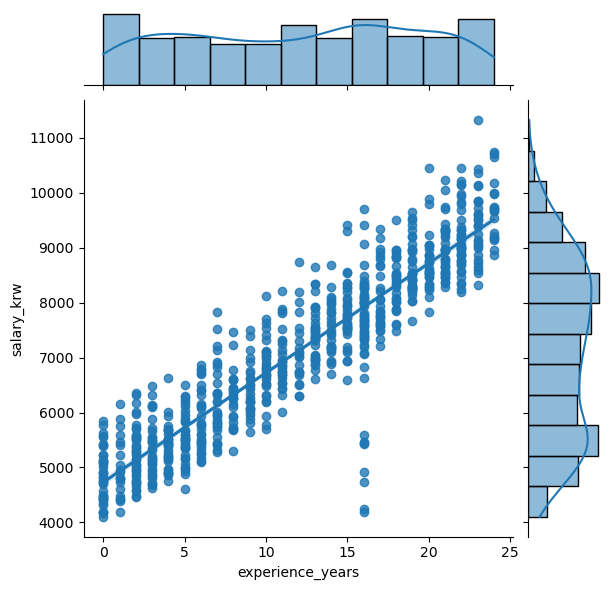

In [7]:
sns.jointplot(data=emp_df, x='experience_years', y='salary_krw', kind='reg')

In [8]:
'''
[문제04] 직급(position)에 따른 직원분포 확인하려고 합니다. seaborn의 countplot을 사용하여 position 컬럼의 각 값들이 몇번 나타나는지 시각화하세요.
- x축 : position
- y축 : emp_df
- 추가옵션 : 직급 순서(order)를 ['사원','대리','과장','팀장']으로 지정해서 표시
'''

"\n[문제04] 직급(position)에 따른 직원분포 확인하려고 합니다. seaborn의 countplot을 사용하여 position 컬럼의 각 값들이 몇번 나타나는지 시각화하세요.\n- x축 : position\n- y축 : emp_df\n- 추가옵션 : 직급 순서(order)를 ['사원','대리','과장','팀장']으로 지정해서 표시\n"

In [9]:
import platform
from matplotlib import rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

In [12]:
print(emp_df['position'].head())

0    대리
1    팀장
2    사원
3    과장
4    대리
Name: position, dtype: object


<Axes: xlabel='position', ylabel='count'>

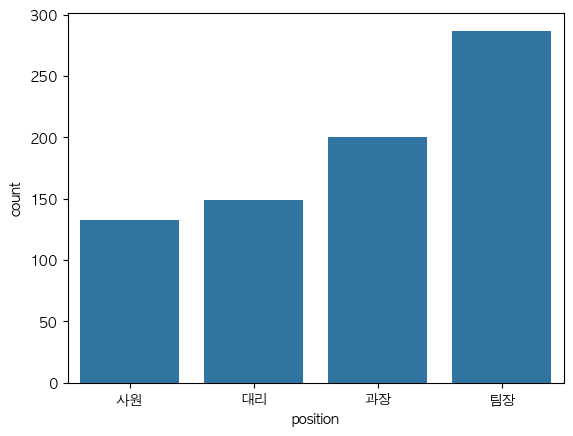

In [14]:
position_order = ['사원','대리','과장','팀장']
sns.countplot(data=emp_df, x='position', order=position_order)

In [ ]:
'''
[문제05] 부서(departmetn)와 직급(position)을 조합했을 때의 평균 성과점수(performance_score)를 확인하고자 합니다. groupby()를 사용하여 데이터를 두 기준으로 그룹화하고, 평균 성과점수를 계산하세요.
'''

In [21]:
avg_score = emp_df.groupby(['department','position'])['performance_score'].mean()
avg_score

department  position
개발          과장          79.727273
            대리          78.406250
            사원          80.228571
            팀장          80.176471
마케팅         과장          83.653846
            대리          82.750000
            사원          81.516129
            팀장          79.750000
영업          과장          80.452381
            대리          78.562500
            사원          79.689655
            팀장          78.314286
인사          과장          82.711111
            대리          79.106383
            사원          77.419355
            팀장          79.621212
Name: performance_score, dtype: float64

In [ ]:
'''
[문제06] 모델링을 위해 데이터의 결측치를 처리하려고 합니다. 아래 가이드에 따라 결측치를 처리하고, 결과를 emp_pre 변수에 저장하세요.
- emp_df 데이터프레임을 복사하여 emp_pre를 생성합니다.
- performance_score, projects_completed, team_size 컬럼의 결측치는 각 컬럼의 평균값으로 채우세요.
- department, education_level, position 컬럼의 결측치가 있는 행은 데이터 수가 적으므로, 해당 행들을 모두 삭제하세요.(dropna함수 사용)
'''

In [36]:
emp_pre = emp_df.copy()
emp_pre

,department,experience_years,education_level,position,performance_score,projects_completed,team_size,training_hours,language_skill,salary_krw
0,인사,8.0,석사,대리,78.0,11.0,6.0,12.0,상,6600.0
1,인사,18.0,학사,팀장,85.0,17.0,9.0,76.0,하,8072.0
2,영업,2.0,학사,사원,64.0,3.0,4.0,96.0,중,4488.0
3,영업,9.0,학사,과장,62.0,16.0,NaN,37.0,중,6330.0
4,영업,6.0,학사,대리,93.0,15.0,13.0,16.0,중,5433.0
...,...,...,...,...,...,...,...,...,...,...
795,마케팅,10.0,석사,과장,100.0,18.0,2.0,18.0,상,7542.0
796,마케팅,12.0,학사,과장,77.0,10.0,NaN,57.0,중,6516.0
797,개발,23.0,박사,팀장,89.0,15.0,12.0,30.0,상,11322.0
798,마케팅,23.0,학사,팀장,76.0,12.0,4.0,74.0,하,8586.0


In [37]:
emp_pre.isnull().sum()

department            23
experience_years       0
education_level        0
position              31
performance_score     22
projects_completed    27
team_size             21
training_hours         0
language_skill         0
salary_krw             0
dtype: int64

In [38]:
# performance_score, projects_completed, team_size 는 평균으로 채우기
null_to_mean_list = ['performance_score','projects_completed','team_size']
for col in null_to_mean_list:
    mean_val = emp_pre[col].mean()
    emp_pre[col].fillna(mean_val, inplace=True)

emp_pre.isnull().sum()

/var/folders/kn/2bm1tvkx58qgg76b0m41c68c0000gn/T/ipykernel_59681/3766825853.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  emp_pre[col].fillna(mean_val, inplace=True)


department            23
experience_years       0
education_level        0
position              31
performance_score      0
projects_completed     0
team_size              0
training_hours         0
language_skill         0
salary_krw             0
dtype: int64

In [39]:
emp_pre.dropna(subset=['department','position','education_level'], inplace=True)
emp_pre.isnull().sum()

department            0
experience_years      0
education_level       0
position              0
performance_score     0
projects_completed    0
team_size             0
training_hours        0
language_skill        0
salary_krw            0
dtype: int64

In [40]:
'''
[문제07] 숫자가 있는 범주형 데이터(education_level, position, language_skill)를 모델이 이해할 수 있는 숫자형으로 변환하려고 합니다. map()함수를 사용하여 아래의 규칙에 따라 각 컬럼을 직접 인코딩하세요.
- education_level: 고졸=0, 학사=1, 석사=2, 박사=3
- position : 사원=0, 대리=1, 과장=2, 팀장=3
- language_skill : 하=0, 중=1, 상=2
- 힌트 : department 컬럼은 get_dummies를 사용할 예정이므로 이 문제에서는 제외합니다.
'''

'\n[문제07] 숫자가 있는 범주형 데이터(education_level, position, language_skill)를 모델이 이해할 수 있는 숫자형으로 변환하려고 합니다. map()함수를 사용하여 아래의 규칙에 따라 각 컬럼을 직접 인코딩하세요.\n- education_level: 고졸=0, 학사=1, 석사=2, 박사=3\n- position : 사원=0, 대리=1, 과장=2, 팀장=3\n- language_skill : 하=0, 중=1, 상=2\n- 힌트 : department 컬럼은 get_dummies를 사용할 예정이므로 이 문제에서는 제외합니다.\n'

In [41]:
education_level_map = {'고졸' : 0, '학사' : 1, '석사' : 2, '박사' : 3}
position_map = {'사원' : 0, '대리' : 1, '과장' : 2, '팀장' : 3}
language_skill_map = {'하' : 0, '중' : 1, '상' : 2}

emp_pre['education_level'] = emp_pre['education_level'].map(education_level_map)
emp_pre['position'] = emp_pre['position'].map(position_map)
emp_pre['language_skill'] = emp_pre['language_skill'].map(language_skill_map)

emp_pre.head()

,department,experience_years,education_level,position,performance_score,projects_completed,team_size,training_hours,language_skill,salary_krw
0,인사,8.0,2,1,78.0,11.0,6.000000,12.0,2,6600.0
1,인사,18.0,1,3,85.0,17.0,9.000000,76.0,0,8072.0
2,영업,2.0,1,0,64.0,3.0,4.000000,96.0,1,4488.0
3,영업,9.0,1,2,62.0,16.0,7.359435,37.0,1,6330.0
4,영업,6.0,1,1,93.0,15.0,13.000000,16.0,1,5433.0


In [ ]:
'''
[문제08] 순서가 없는 범주형 데이터(department)를 원-핫 인코딩으로 변환하고, 훈련과 검증에 사용할 데이터셋을 분리하려고 합니다. 아래 순서에 따라 코드를 작성하세요.
- pandas의 get_dummies() 함수를 사용하여 department 컬럼을 원-핫 인코딩하고, 결과를 emp_encoded 변수에 저장하세요.
- emp_encoded 데이터셋에서 salary_krw 컬럼을 label y로, 나머지 컬럼들을 feature X로 할당하세요.
- train_test_split 함수를 사용하여 훈련 데이터셋과 검증 데이터셋을 8:2 비율로 분리하세요.(random_state=123)
'''

In [45]:
emp_encoded = pd.get_dummies(emp_pre, columns=['department'])
emp_encoded

,experience_years,education_level,position,performance_score,projects_completed,team_size,training_hours,language_skill,salary_krw,department_개발,department_마케팅,department_영업,department_인사
0,8.0,2,1,78.0,11.0,6.000000,12.0,2,6600.0,False,False,False,True
1,18.0,1,3,85.0,17.0,9.000000,76.0,0,8072.0,False,False,False,True
2,2.0,1,0,64.0,3.0,4.000000,96.0,1,4488.0,False,False,True,False
3,9.0,1,2,62.0,16.0,7.359435,37.0,1,6330.0,False,False,True,False
4,6.0,1,1,93.0,15.0,13.000000,16.0,1,5433.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,10.0,2,2,100.0,18.0,2.000000,18.0,2,7542.0,False,True,False,False
796,12.0,1,2,77.0,10.0,7.359435,57.0,1,6516.0,False,True,False,False
797,23.0,3,3,89.0,15.0,12.000000,30.0,2,11322.0,True,False,False,False
798,23.0,1,3,76.0,12.0,4.000000,74.0,0,8586.0,False,True,False,False


In [48]:
#emp_encoded 데이터셋에서 salary_krw 컬럼을 label y로, 나머지 컬럼들을 feature X로 할당하세요.
#train_test_split 함수를 사용하여 훈련 데이터셋과 검증 데이터셋을 8:2 비율로 분리하세요.(random_state=123)
from sklearn.model_selection import train_test_split

X = emp_encoded.drop(['salary_krw'], axis=1)
y = emp_encoded['salary_krw']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(597, 12) (150, 12)
(597,) (150,)


In [ ]:
'''
[문제09] 수치형 데이터들의 단위를 맞춰주기 위해 데이터 스케일링을 진행합니다. 이상치(outlier)의 영향을 덜받는 RobustScaler를 사용하여 훈련 데이터와 검증 데이터의 Feature(X_train, X_valid)를 스케일링하는 코드를 작성하세요. 
- sklearn.preprocessing 의 RobustScaler 함수 사용
'''

In [51]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_trian_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit(X_valid)

In [ ]:
'''
[문제10] 서포트 벡터 머신(SVM)의 회귀 모델 버전인 SVR을 사용하여 연봉 예측 모델을 학습시키려고 합니다. 아래 가이드에 따라 모델을 생성하고 학습시키는 코드를 작성하세요.
- sklearn.svm의 SVR함수 사용
- 하이퍼 파라미터 : kernel : 'rbf', C : 1.0
- 모델 객체는 model_svr 변수에 저장하고, 스케일링된 훈련 데이터로 학습시키세요.
'''

In [53]:
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf', C=1.0)
model_svr.fit(X_trian_scaled, y_train)

SVR()